HW6
ALI BEHROUZI 4010724002 

# Convolutional Neural Network

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


### Importing the libraries

In [2]:
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator

## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [4]:
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest'

  )
training_set= train_datagen.flow_from_directory(
    '/content/gdrive/My Drive/dataset/training_set',
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)

Found 8000 images belonging to 2 classes.


### Preprocessing the Test set

In [5]:
test_datagen = ImageDataGenerator(
      rescale=1./255)
test_set=test_datagen.flow_from_directory(
    '/content/gdrive/My Drive/dataset/test_set',
    target_size=(150,150),
    batch_size=32,
    class_mode='binary'
)

Found 2000 images belonging to 2 classes.


## Part 2 - Building the CNN

### Initialising the CNN

In [6]:
cnn =tf.keras.models.Sequential()

### Step 1 - Convolution

In [7]:
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3,activation='relu',input_shape=[150,150,3]))

### Step 2 - Pooling

In [8]:
cnn.add(tf.keras.layers.MaxPooling2D((2,2)))

### Adding three more convolutional layers

In [9]:
cnn.add(tf.keras.layers.Conv2D(filters=64,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPooling2D((2,2)))

In [10]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPooling2D((2,2)))

In [11]:
cnn.add(tf.keras.layers.Conv2D(filters=128,kernel_size=3,activation='relu'))
cnn.add(tf.keras.layers.MaxPooling2D((2,2)))

### Step 3 - Flattening

In [12]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

In [13]:
cnn.add(tf.keras.layers.Dropout(0.5))

In [14]:
cnn.add(tf.keras.layers.Dense(units=512,activation='relu'))

### Step 5 - Output Layer

In [15]:
cnn.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

## Part 3 - Training the CNN

### Compiling the CNN

In [16]:
cnn.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

### Training the CNN on the Training set and evaluating it on the Test set

In [17]:
history=cnn.fit(x=training_set,validation_data=test_set,epochs=30)

Epoch 1/30
250/250 [==============================] - 1219s 5s/step - loss: 0.6908 - accuracy: 0.5286 - val_loss: 0.6994 - val_accuracy: 0.5070
Epoch 2/30
250/250 [==============================] - 710s 3s/step - loss: 0.6923 - accuracy: 0.4997 - val_loss: 0.6912 - val_accuracy: 0.5000
Epoch 3/30
250/250 [==============================] - 670s 3s/step - loss: 0.6823 - accuracy: 0.5515 - val_loss: 0.6676 - val_accuracy: 0.6130
Epoch 4/30
250/250 [==============================] - 713s 3s/step - loss: 0.6666 - accuracy: 0.5834 - val_loss: 0.6622 - val_accuracy: 0.5970
Epoch 5/30
250/250 [==============================] - 707s 3s/step - loss: 0.6456 - accuracy: 0.6210 - val_loss: 0.6117 - val_accuracy: 0.6770
Epoch 6/30
250/250 [==============================] - 669s 3s/step - loss: 0.6219 - accuracy: 0.6501 - val_loss: 0.5785 - val_accuracy: 0.7080
Epoch 7/30
250/250 [==============================] - 712s 3s/step - loss: 0.6004 - accuracy: 0.6725 - val_loss: 0.5844 - val_accuracy: 0.680

In [18]:
import numpy as np

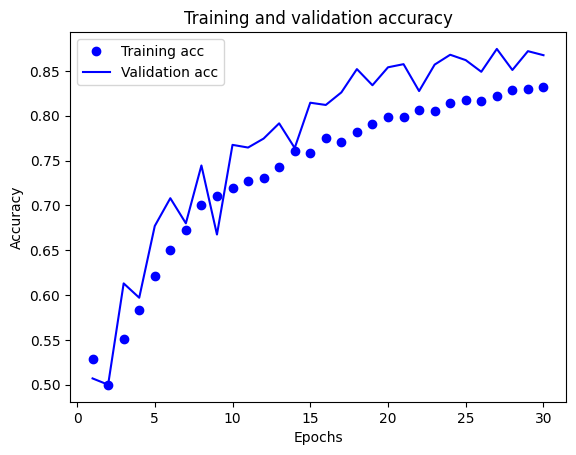

In [19]:
import matplotlib.pyplot as plt

history_dict = history.history

epochs = range(1, 30 + 1)

acc_values = history_dict['accuracy']
val_acc_values = history_dict['val_accuracy']

plt.plot(epochs,acc_values,'bo',label='Training acc')
plt.plot(epochs,val_acc_values,'b',label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [20]:
# Find the epoch with the best validation accuracy
best_epoch = np.argmax(val_acc_values)

# Print the training and validation accuracy for the best epoch
print(f"Best Epoch: {best_epoch + 1}")
print(f"Training Accuracy: {acc_values[best_epoch]}")
print(f"Validation Accuracy: {val_acc_values[best_epoch]}")

Best Epoch: 27
Training Accuracy: 0.8220000267028809
Validation Accuracy: 0.8744999766349792


## Part 4 - Making a single prediction

In [21]:
from tensorflow.keras.preprocessing import image
test_image = image.load_img('/content/gdrive/My Drive/dataset/single_prediction/cat_or_dog_1.jpg', target_size = (150, 150)) # this is a dog picture
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
cnn.save('cd.h5')
training_set.class_indices
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'

print(prediction)

1/1 [==============================] - 1s 538ms/step
dog
